In [244]:
%load_ext autoreload
%autoreload 2

from vnl_mjx.tasks.rodent import render_ghost
from mujoco_playground._src.locomotion.go1 import base as go1_base
import mujoco as mj
import mediapy as media
import imageio
import jax
from jax import numpy as jp
from tqdm import tqdm
import h5py

import os

xla_flags = os.environ.get("XLA_FLAGS", "")
xla_flags += " --xla_gpu_triton_gemm_any=True"
os.environ["XLA_FLAGS"] = xla_flags
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["MUJOCO_GL"] = "egl"
os.environ["PYOPENGL_PLATFORM"] = "egl"

# Enable persistent compilation cache.
jax.config.update("jax_compilation_cache_dir", "/tmp/jax_cache")
jax.config.update("jax_persistent_cache_min_entry_size_bytes", -1)
jax.config.update("jax_persistent_cache_min_compile_time_secs", 0)

def render(model, data=None, height=600, camera=-1):
    if data is None:
        data = mj.MjData(model)
    with mj.Renderer(model, 2160, 3840) as renderer:
        mj.mj_forward(model, data)
        renderer.update_scene(data, camera=camera)
        frame = renderer.render()
        media.show_image(frame, height=height)
        imageio.imwrite("render.png", frame)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
env = render_ghost.RodentRender()
for i in range(10):
    env.add_rodent((0.1 * i, 0, 0), suffix=f"_{i}")
env._spec.worldbody.add_light(pos=(0, 0, 2), dir=(0, 0, -1))
env.compile()

""

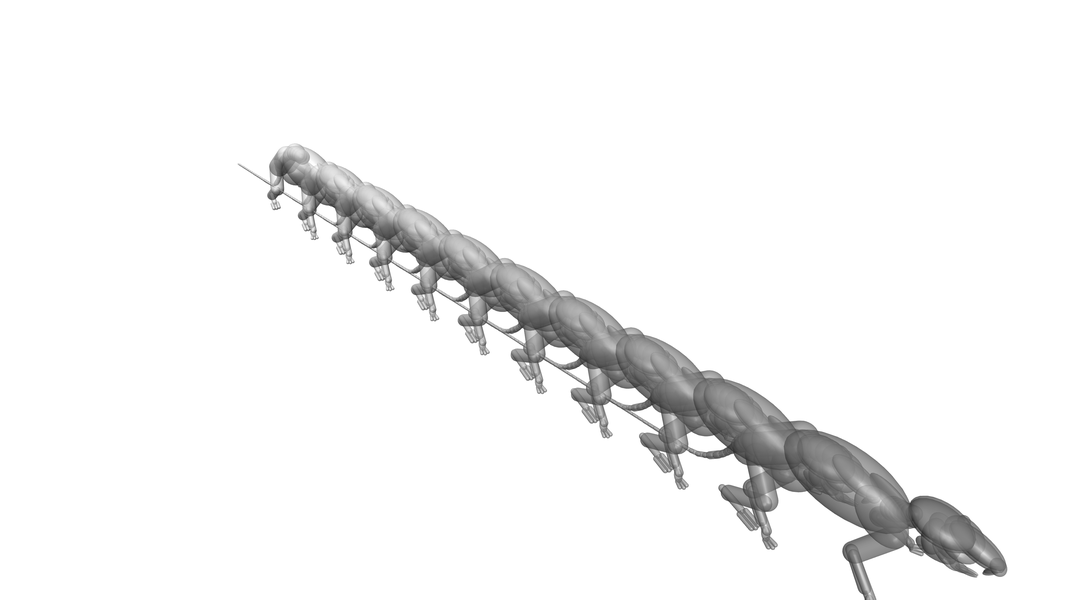

In [247]:
render(env.mj_model, camera="close_profile_5")

In [248]:
with h5py.File("/root/vast/scott-yang/track-mjx/data/transform_snips.h5", "r") as data:
    qpos = jp.array(data["qpos"][()])

In [249]:
# slices = qpos[::10][80:85]
stride = 15
i = 53
window = 10
slices = qpos[::stride][i : i + window]
# offset the x-axis
slices = slices.at[:, 0].set(slices[:, 0] + jp.arange(window) * 0.14)

""

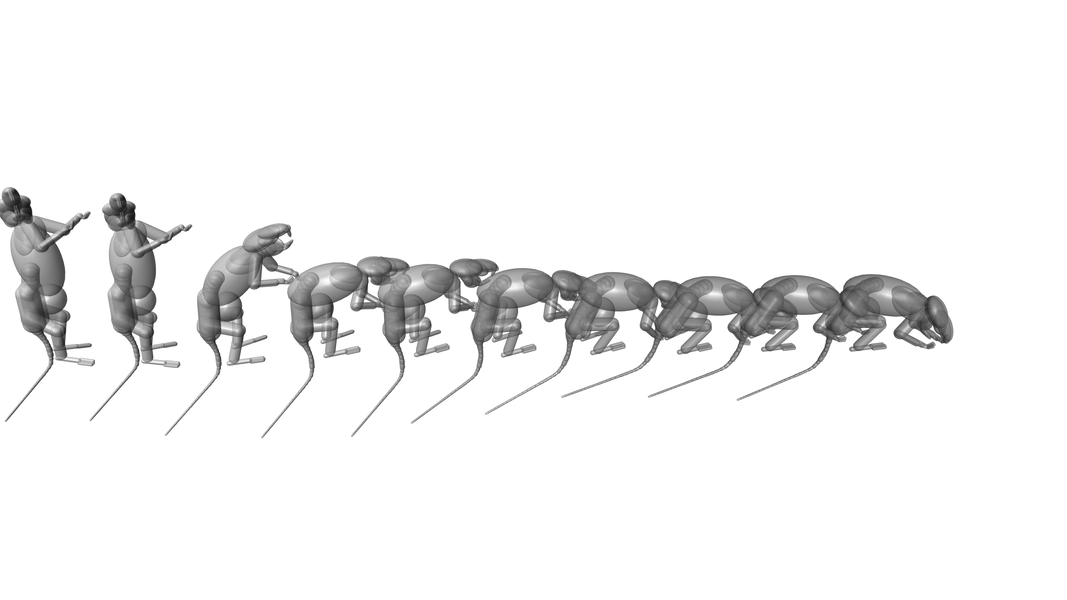

: 

In [ ]:
data = mj.MjData(env.mj_model)
data.qpos = slices.reshape(-1)
# data.qpos = slices[3]
render(env.mj_model, data, camera="side_5")

In [188]:
with h5py.File("/root/vast/scott-yang/track-mjx/data/transform_snips.h5", "r") as data:
    qpos = jp.array(data["qpos"][()])

In [189]:
qpos.shape

(210500, 74)

In [52]:
data.joints.shape

(842, 250, 67)